# IBM EDA Course Project

This document corresponds to both the code and the explanations for the final project of the IBM Exploratory Data Analysis Course. The dataset chosen is the "Titanic - Machine Learning from Disaster" training set. The choice was due to the recommendation of the Kaggle platform since it is the first Machine Learning challenge users usually get into. The goal is to develop machine learning algorithms to predict which passengers survived the Titanic disaster.

The dataset contains individual characteristics of each individual real passenger that embarked on the Titanic ship, which are considered to be our features, and the information if they survived or not is the intended prediction. The variables are:

* **Survived** (yes=1, no=0)
* **PassengerId** (Passenger Identification)
* **Name** (Passenger Name)
* **Age** (Passenger Age)
* **Sex** (Passenger Sex)
* **Fare** (Passenger Fare)
* **Ticket** (Ticket Number)
* **Pclass** (Ticket Class, 1 = 1st, 2 = 2nd, 3 = 3rd)
* **Cabin** (Cabin Number)
* **SibSp** (# of siblings / spouses aboard the Titanic)
* **Parch** (# of parents / children aboard the Titanic)
* **Embarked** (Port of Embarkation, C = Cherbourg, Q = Queenstown, S = Southampton)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder

In [2]:
df = pd.read_csv('Titanic_Train.csv')
df.head() # Brief visualiation of the dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The initial plan to explore the data consists in first dealing with inherent data problems, such as missing data, outliers and duplicate values. Then, in order to better understand relations between the attributes and the target variable, some data viualisation is intended. Finally, if needed, any feature engineering might be performed, to possibly drop an unneeded variable, enhance correlations or put variables in scale for better comparation. To first explore the data we examine each attribute type and the number of non-null values.

## Data Cleaning

In [3]:
df.info() # Check for null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


From this output we can see that the attributes "Age", "Cabin" and "Embarked" have missing data. Precisely, "Embarked", "Age" and "Cabin" have 2, 177 and 687 missing values, respectively. Due to the huge amount of missing values of "Cabin" and also the fact that its information is probably contained in the "Pclass" attribute (since cabins of a same class are usually closely located in ships), it is then dropped. 

In [4]:
df = df.drop(columns = "Cabin")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Even though the quantity of the "Age" category missing data is significant, which could lead to the impulsive action of dropping the whole attribute, the idea behind this feature and how they could relate to the target variable is discussed before commiting to a more drastic action. Intuitively, this variable can easily correlate to the survival of the passengers: The age can mean more experience and thus greater capability of taking self-care, or also can indicate the lack of physical capabilities from elder passengers. With this in mind, this feature is now analysed through an histogram. 

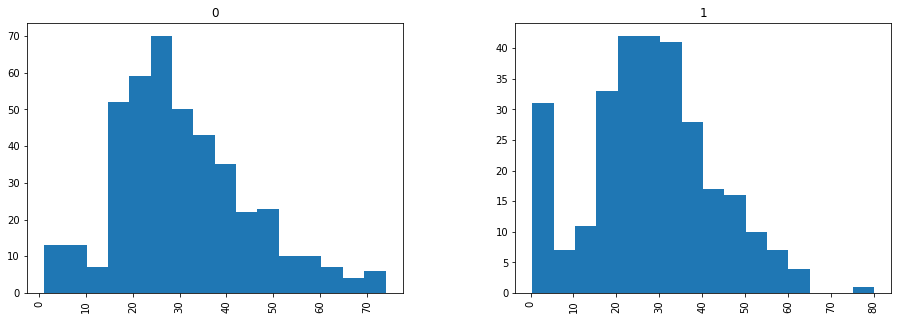

In [5]:
df.Age.hist(by=df.Survived, bins = 16, figsize = (15,5));

As expected, most of the passengers that survived are contained between 15 and 35 years. However, the total number of passengers is mostly contained on the exact same interval. So, there is not a clear idea of the proper behaviour, due to the non-uniformity of the total "Age" attribute. Thus, the most intuitive way to impute "Age" is through the attribute's median, since there is some skew on data, as stated (greater concentration on the 15-35yrs left side), in each separate case and also in the total histogram. Also, since the attribute "Embarked" is only missing two values, it is chosen to be imputed with its mode.

In [6]:
df.fillna(value = {'Age':df.Age.median(), 'Embarked':df.Embarked.mode().at[0]}, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


Now, with all missing data handled, the evaluation to check for duplicate entries is performed:

In [7]:
df_duplicates = df[df.duplicated()] # Checking duplicates via boolean mask
print(df_duplicates)

Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Embarked]
Index: []


Thus, no duplicate is found. Which leads to the last step executed here for cleaning the data which is to find outliers, done using the statistical IQR method.

In [8]:
df_stats = df.describe()
df_stats.loc['range'] = df_stats.loc['75%'] - df_stats.loc['25%'] # Interquartile range 
df_stats.loc['min_for_out'] = df_stats.loc['25%'] - 1.5 * df_stats.loc['range'] # Minimum value to be considered outlier
df_stats.loc['max_for_out'] = df_stats.loc['75%'] + 1.5 * df_stats.loc['range'] # Maximum value to be considered outlier
out_cols = ['min_for_out','min','25%','50%','75%','range','max','max_for_out'] # Select interesting columns to display
df_stats = df_stats.loc[out_cols]
df_stats

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
min_for_out,-444.0,-1.5,0.5,2.50,-1.5,0.0,-26.7240
min,1.0,0.0,1.0,0.42,0.0,0.0,0.0000
25%,223.5,0.0,2.0,22.00,0.0,0.0,7.9104
50%,446.0,0.0,3.0,28.00,0.0,0.0,14.4542
75%,668.5,1.0,3.0,35.00,1.0,0.0,31.0000
range,445.0,1.0,1.0,13.00,1.0,0.0,23.0896
max,891.0,1.0,3.0,80.00,8.0,6.0,512.3292
max_for_out,1336.0,2.5,4.5,54.50,2.5,0.0,65.6344


Which indicates the possibility of outliers on the "Age", "SibS", "Parch", and "Fare" columns. We plot the histogram of each of these attributes in order to visualize if it is indeed the case.

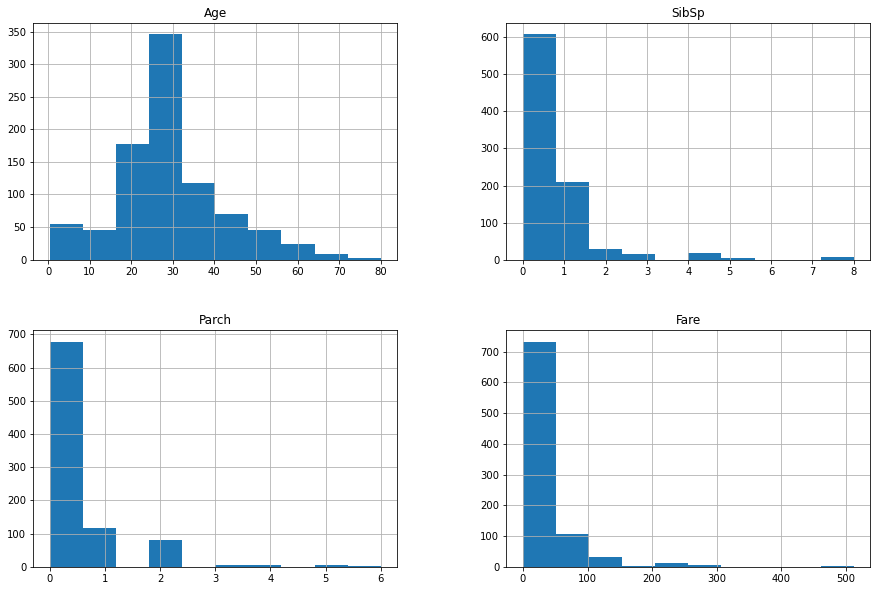

In [9]:
df.hist(["Age","SibSp","Parch","Fare"], figsize = (15,10));

Since all the outliers visualized seem to be "grouped", that is, are not isolated cases, they are kept, because instead of a scale mistake, they might be representing a particular characteristic of a select group of people.

## Exploratory Data Analysis and  Feature Engineering

Before performing any variable selection, transformation or enconding, a detailed and dvierse visulisation of the features' behaviour is executed.

C:\Users\leona\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\boxplot.py:385: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
  ax = boxplot(


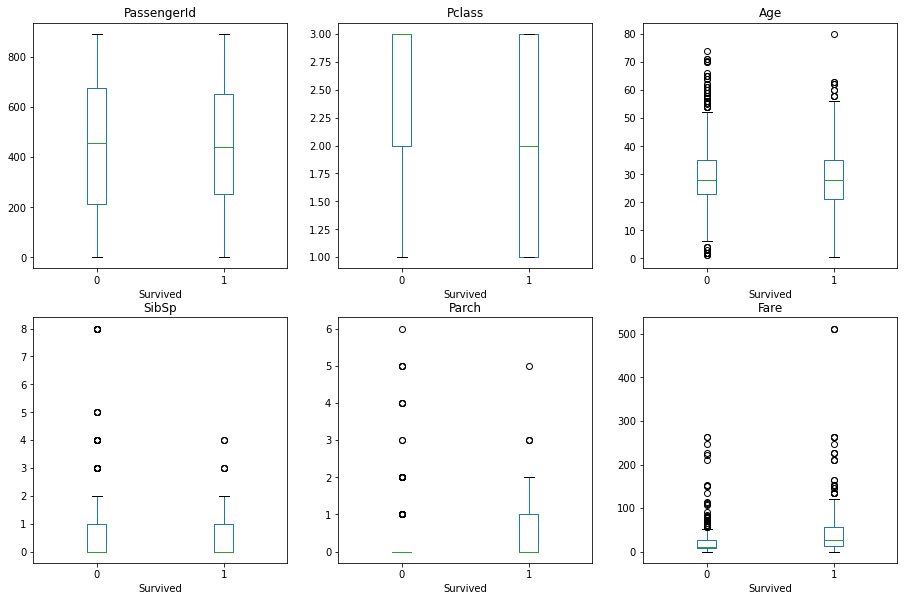

In [10]:
num_cols = df.select_dtypes('number').columns
fig, axs = plt.subplots(2,3,figsize=(15,10), sharey = False, sharex = False);
att_num_cols = num_cols.drop('Survived').tolist()
df.boxplot(att_num_cols,'Survived', ax = axs,grid = False);
fig.suptitle('');

From the plots above, some direct comments can be derived. On the first plot, it is noted that the "PassengerId" attribute seems to have no relation at all with the target variable, since the distributions for both survival cases are almost the same. However, any relation inside the interquartile range could still happen, so further investigation will be done. From the second plot, there is a very important information: at least 75% of the passengers that did not survive come from both the second and third classes. Also, on the Parch attribute box plot, we can se that pratically all passengers that did not survive had no parents or children, being all that had at least one outliers. The survived ones tended more to have at least one parent or child. Lastly, on the Fare boxplot, it seems that those who survived tended to have a higher fare, which corroborates with the idea given by the Pclass attribute: those who were more rich had a greater chance of survival. The other categories not mentioned don't have information as clear as the ones discussed.

Now we analyse the correlations between all numeric columns.

In [11]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.034212,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500
Age,0.034212,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688
SibSp,-0.057527,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000


From this table, we initially confirm the decorrelation between the "Survived" target variable and the "PassengerId" feature. Also, as we suspected from previous analysis the features that related the most with "Survived" are the "PClass" and "Fare" targets, both who represent the acquisition power of the passenger. It is no surprise that the correlation between these two features is the highest, with a module of 0,5495. Some other significant correlations are (Age,Pclass),(Age,SibSp) indicating that older passengers tend to stay at lower classes and be more alone; and also (Parch,SibSp) meaning the more spouses/siblings, the more parents/children, meaning families that embarked together. 

Now we visualise these relation pair by pair and also with a linear regression.

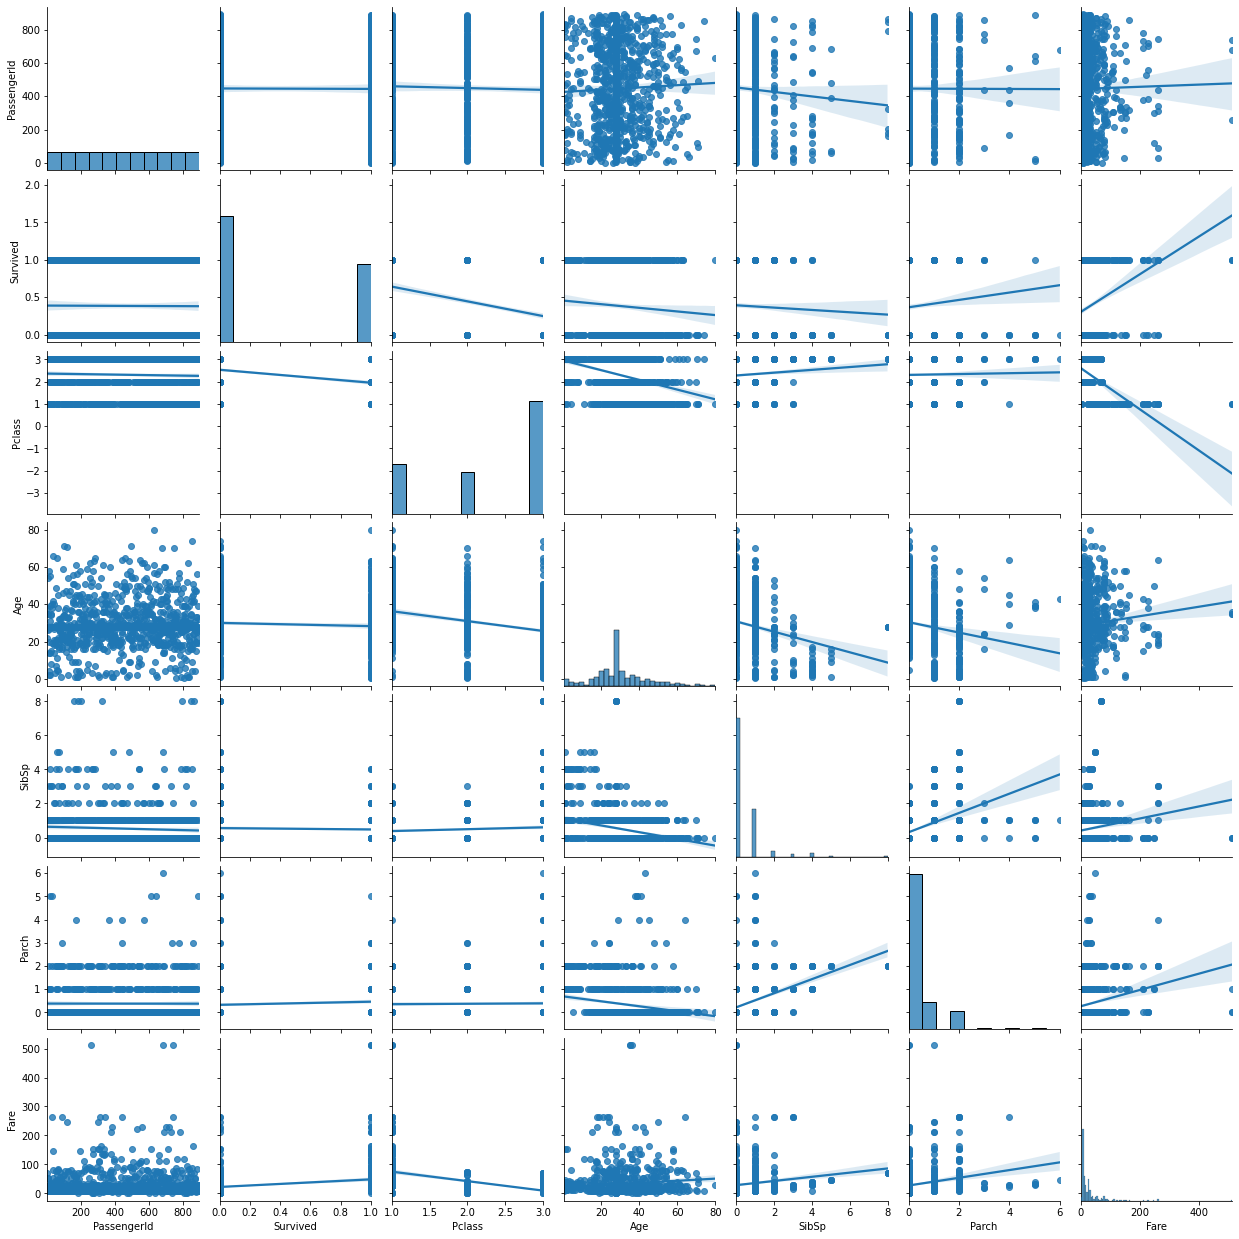

In [12]:
sns.pairplot(df, kind = 'reg')

So, as seen in the little relation with all data seen in previous analysis and the graphs above, the "PassengerId" column is decided to be dropped, since it was seen to have little or no conection at all with the rest of data and the target variable.

In [13]:
df = df.drop(columns = 'PassengerId')
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Since data often comes Skewed, we can appply a log-transformation in order to make it behave more like normal. This decision is applied only on the single continous variable, "Fare".

In [14]:
num_cols = df.select_dtypes('number').columns
skew_vals = df[num_cols].skew()
skew_limit = 0.75
skew_cols = skew_vals[abs(skew_vals)>skew_limit].sort_values(ascending = False)
print(skew_cols)

Fare     4.787317
SibSp    3.695352
Parch    2.749117
dtype: float64


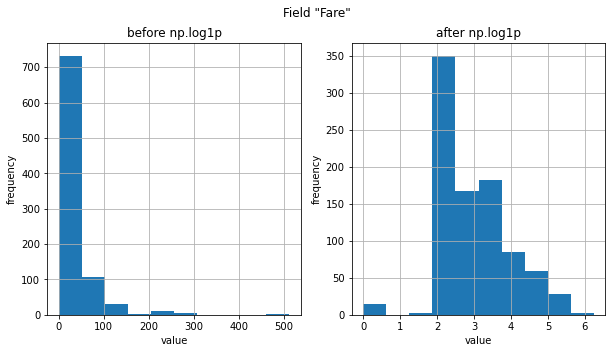

In [15]:
field = "Fare"

fig, (ax_b, ax_a) = plt.subplots(1, 2, figsize=(10, 5))
df[field].hist(ax=ax_b)
df[field] = df[field].apply(np.log1p)
df[field].hist(ax=ax_a)

# Formatting of titles etc. for each subplot
ax_b.set(title='before np.log1p', ylabel='frequency', xlabel='value')
ax_a.set(title='after np.log1p', ylabel='frequency', xlabel='value')
fig.suptitle('Field "{}"'.format(field));

In [16]:
df['Fare'].skew()

0.3949280095189306

Another effect of the transformation is the raise in correlation with the "Survived" attribute (now 0.32 before 0.25) and also other features:

In [17]:
df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.329862
Pclass,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.661022
Age,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.110964
SibSp,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.318528
Parch,0.081629,0.018443,-0.172482,0.414838,1.000000,0.332186
Fare,0.329862,-0.661022,0.110964,0.318528,0.332186,1.000000


Now, treating the categorical variables, we can plot some data relations in order to have any insights. First, analysing the categories "Sex" and "Embarked" we plot the following histograms:

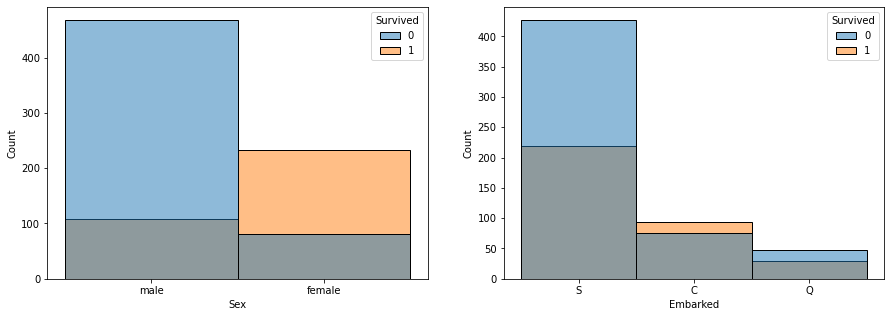

In [18]:
fig, axs = plt.subplots(1,2,figsize=(15,5))
sns.histplot(ax=axs[0],x='Sex',hue='Survived',data=df)
sns.histplot(ax=axs[1],x="Embarked",hue ="Survived",data=df);

Some extremely important information is found on theses graphs: from the left one we can see that there were more women that survived, even though the number of men were greater on the ship. Probably this was due to the evacuation protocols: "children and women first". Also, the graph on the left tells us that passenger who embarked on both the 'S' and 'Q' port are almost twice more likely not to have survived and that passengers from the 'C' port survived or not in almost the same proportion. So, the attribute "Sex" is encoded with binary encoding, and the "Embarked" will receive a One-Hot-Encoding.

In [19]:
df = pd.get_dummies(df, columns = ['Sex'], drop_first = True)
df = pd.get_dummies(df, columns = ['Embarked'])
df.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,2.110213,1,0,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,4.280593,0,1,0,0
2,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,2.188856,0,0,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,3.990834,0,0,0,1
4,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,2.202765,1,0,0,1


Now, analysing the feature "Name", at first glance it might seem unusable, since it is particular to each one and serves just the same purpose as the "PassengerId". However, if we notice, we can group passengers by family based on the ones that share the same last name. So, in order to do this, the column "Name" is separated into two columns, "First_Name", and "Last_Name".

In [20]:
sep = df.Name.str.split(',',n=1, expand =True)
df['Last_Name'] = sep[0]
df['First_Name']= sep[1]
df.drop(columns = ['Name'], inplace = True)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Last_Name,First_Name
0,0,3,22.0,1,0,A/5 21171,2.110213,1,0,0,1,Braund,Mr. Owen Harris
1,1,1,38.0,1,0,PC 17599,4.280593,0,1,0,0,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,1,3,26.0,0,0,STON/O2. 3101282,2.188856,0,0,0,1,Heikkinen,Miss. Laina
3,1,1,35.0,1,0,113803,3.990834,0,0,0,1,Futrelle,Mrs. Jacques Heath (Lily May Peel)
4,0,3,35.0,0,0,373450,2.202765,1,0,0,1,Allen,Mr. William Henry


We now check the histograms for both Name columns:

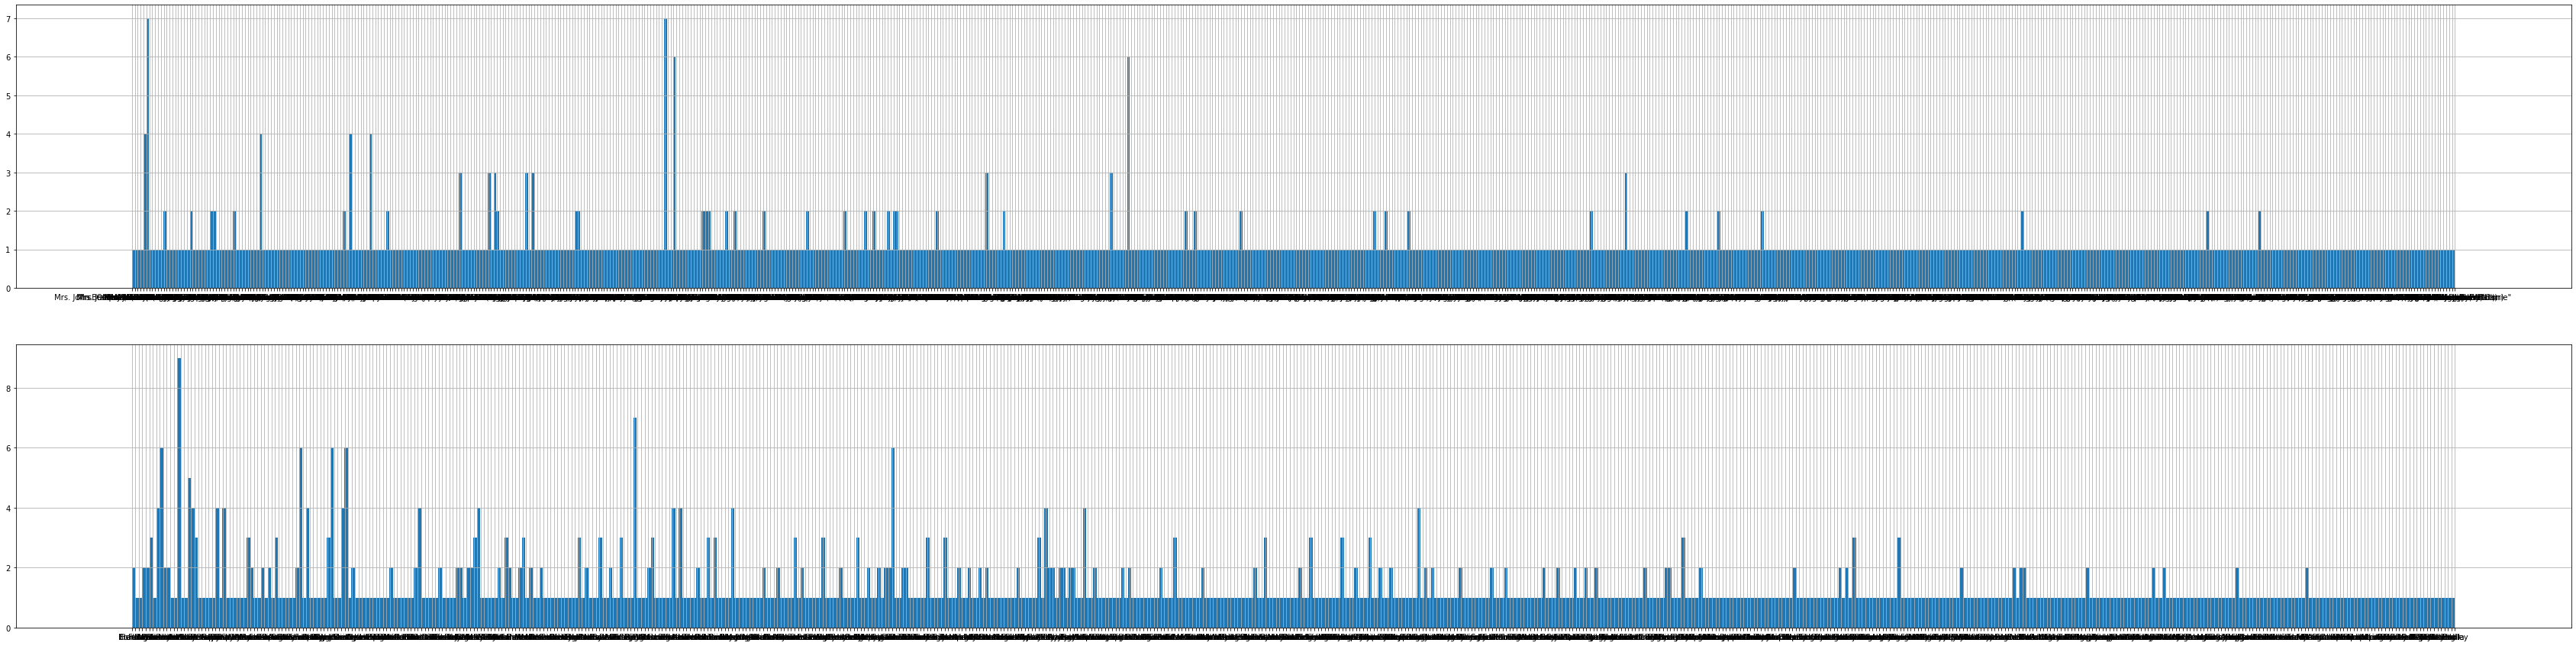

In [21]:
fig, axs = plt.subplots(2,1,figsize=(60,15))
df.First_Name.hist(ax = axs[0], bins = 803) # Chosen by df.First_Name.value_counts()
df.Last_Name.hist(ax = axs[1], bins = 667); # Chosen by df.Last_Name.value_counts()

From the histograms above, we can see that most entries for the First Name happen only once, with some that have more than one occurence, probably caused by popular names, such as "James", "John", "Mary", and "William", which are the four most popular. On the second graph however, we can see that a more significat number entries occur more than once. This could mean couples or even families, that have the same name all together. So, it is decided to drop the "First_Name" column, since there is no informataion at all, an to the "Last_Name" column an ordinal encoding will be executed. This means that, for a given entry, the column "Last_Name" will represent how many other people have the same last name, as a probability of having this many relatives.

In [22]:
df.drop(columns = 'First_Name', inplace = True)
LName_count = df.Last_Name.value_counts().to_dict()
dic_to_replace = {'Last_Name': LName_count}
df.replace(dic_to_replace, inplace = True)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Last_Name
0,0,3,22.0,1,0,A/5 21171,2.110213,1,0,0,1,2
1,1,1,38.0,1,0,PC 17599,4.280593,0,1,0,0,1
2,1,3,26.0,0,0,STON/O2. 3101282,2.188856,0,0,0,1,1
3,1,1,35.0,1,0,113803,3.990834,0,0,0,1,2
4,0,3,35.0,0,0,373450,2.202765,1,0,0,1,2


A correlation analysis is then run:

In [23]:
df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Last_Name
Survived,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.329862,-0.543351,0.168240,0.003650,-0.149683,-0.049188
Pclass,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.661022,0.131900,-0.243292,0.221009,0.074053,0.113262
Age,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.110964,0.081163,0.030248,-0.031415,-0.006729,-0.203841
SibSp,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.318528,-0.114631,-0.059528,-0.026354,0.068734,0.667568
Parch,0.081629,0.018443,-0.172482,0.414838,1.000000,0.332186,-0.245489,-0.011069,-0.081228,0.060814,0.600538
Fare,0.329862,-0.661022,0.110964,0.318528,0.332186,1.000000,-0.263276,0.262341,-0.160456,-0.128846,0.230039
Sex_male,-0.543351,0.131900,0.081163,-0.114631,-0.245489,-0.263276,1.000000,-0.082853,-0.074115,0.119224,-0.118485
Embarked_C,0.168240,-0.243292,0.030248,-0.059528,-0.011069,0.262341,-0.082853,1.000000,-0.148258,-0.782742,-0.089140
Embarked_Q,0.003650,0.221009,-0.031415,-0.026354,-0.081228,-0.160456,-0.074115,-0.148258,1.000000,-0.499421,-0.013230
Embarked_S,-0.149683,0.074053,-0.006729,0.068734,0.060814,-0.128846,0.119224,-0.782742,-0.499421,1.000000,0.086416


Now, as expected, the correlation between the Last_Name column and the columns "SibSp" and "Parch" is greater than 0.6, indicating a strong correlation between these parameters, emphasizing the idea of family/relatives stated before.

Lastly, the attribute Ticket contains the same kind of information brought by the "Last_Name" column, since through a brief analysis of counting its different values, it was seen that families tended to embark using the same ticket number. However, this is a more weak bond because it was seen that there were case of people from the same family/group that had separated tickets. So, since the information is all practicaly contained in the "Last_Name" column, it is then dropped, resulting in our dataset totally prepared for prediction purposes.

In [24]:
df.drop(columns='Ticket', inplace = True)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Last_Name
0,0,3,22.0,1,0,2.110213,1,0,0,1,2
1,1,1,38.0,1,0,4.280593,0,1,0,0,1
2,1,3,26.0,0,0,2.188856,0,0,0,1,1
3,1,1,35.0,1,0,3.990834,0,0,0,1,2
4,0,3,35.0,0,0,2.202765,1,0,0,1,2


## Hypothesis Formulation

**1** <br/>
**Null:** 'Fare' data comes from a Normal distribution, with $\mu$ = 2.962246 and $\sigma$ = 0.969048 <br/>
**Alternative:** 'Fare' data does not come from a Normal distribution.

**2** <br/>
**Null:** As the same number of last names grows, it results in a higher "SibSp".<br/>
**Alternative:** As the same number of last names grows, it does not result in a higher "SibSp".

**3** <br/>
**Null:** The mean value of the "Age" attribute is 29.5 years<br/>
**Alternative:** The mean value of the "Age" attribute is not 29.5 years

The significance test is run for the third hypothesis, better defined as:

$H_{0}: \bar{n} = 29.5$<br/>
$H_{a}: \bar{n} \neq 29.5$

For this case, we use the students' t-test, given the random variable is considered to be independent and identically distributed and that we have a significant amount of samples. The p-level is set to 5%, meaning that we accept a 5% risk that when we reject the null hypothesis we are wrong. The T test statistic is given by the function "t_val", defined below, and its associated p-value is also calculated.

In [26]:
p = 0.05 # Accept a 5% risk that when we reject the null hypothesis we are wrong

def t_val(X, h0):
    return ( np.mean(X)-h0 ) / ( np.sqrt(np.var(X)/len(X)) )

def p_val(t):
    return stats.norm.sf(abs(t))*2 # double-sided

In [27]:
X = df.Age.tolist()
t = t_val(X, 29.5)
p = p_val(t)
t,p

(-0.3175213013870247, 0.7508480789019836)

The t-score states that we are approximately 0.32 standard deviations below from the average mean estimator result that we expect. The p-value means that 75% of possible mean estimates values are further away from our expectation than the value we got. So since $0.75>0.05$ we fail to reject the null hypothesis, and thus the test performed gives us strong evidence that indeed $\bar{n}=29.5$.

The author believes that enough information from the dataset has been already exploited. The significance of each attribute and also the possible concept ideas the data represents were discussed. Also, relations between these attributes and the target variable were also discussed. Visualisation has been done through a series of graphs. Thus, the dataset is considered as almost fully understood and it is now ready for the next step it was intended for: the application of a classifier for binary prediction.  

The dataset is considered as simple, since it contains straightforward relations whose bonds with the target variable are easily identifiable, and is also the entry challenge of the Kaggle website. However, it seems to contain necessary data for the task, considering the strong correlations found between the attributes and the variable intended for prediction. So, the author assumes (since the task of prediction has not been adressed) no more data is necessary for the purpose. 